## Outline the Problem and Assess the Broader Context
> <p ### style="font-family: Arial; font-size:1.4em;color:green;" >Outlining the Problem and assessing the broader context</p>

>One of the main challenges facing the telecom companies is loosing their customers to competitors. Thus, having a clear understanding of the factors resulting in loosing their customer to competitors will go a long way a deveoping strategies to retain their customers. Thus, this task aim at analyzing a dataset from a telecom company containing information about their customers. The goal is to develop a predictive model to identify customers who are likely to churn, i.e., discontinue their service with the company. The tasks to accompanish this gaol are highligted below:

> **Exploratory Data Analysis (EDA):**
Perform a comprehensive exploratory analysis of the dataset. Identify and extract key insights, patterns, and trends that can inform model development and business strategies.

>**Data Preparation:** Spliting the dataset into training and testing subsets.
And making a justification for approach to splitting the data, considering factors such as data balance, temporal aspects, and generalizability of the model.

>**Model Development:**
Build a predictive model to estimate the likelihood of customer churn.
Explain the rationale behind selecting the chosen algorithm, discussing its advantages and any specific considerations relevant to the dataset.

>**Model Evaluation:**
Establish and apply metrics to evaluate the performance of the predictive model.
Include appropriate measures such as accuracy, precision, recall, F1 score, and ROC-AUC, and explain their relevance to the problem.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from scipy.stats import randint
import plotly
import plotly.express as px
import nbformat
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

## Get the data
The telecom company customer churn dataset was obtained from a Kaggle

## Data import

In [2]:
df_customer = pd.read_csv("telecom_customer_data.csv")

### Review of the data structure
Having a brief overview of the data structures - number of columns/features

In [3]:
df_customer.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Overview of the data types & size

In [4]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### **Observations**
* **This dataset has a total of 3341 observation/instances and 21 columns/attributes - state, account length, area code phone number etc.**
* **From the 35 attributes, there's 1 boolean data tpyes,  12 float data types, 4 integer data types and 4 object data types, which means there are about 16 numeric data types and 4 categoric data types.**
* **There are no missing values in the data set. Nonetheless, there's need to make provision for data cleaning because future data may have missing values.** 
* **The target feature/attribute is churn, which is a boolean type data.**

<p ### style="font-family: Arial; font-size:1.4em;" >The following features/variables are available in the dataset</p>

1. State - the state where a customer comes from, which is a string or object type data
2. Account length - number of days a customer has been using services. An integer data type
3. Area code - the area where a customer comes from. An integer data type
4. Phone number - the phone number of a customer. An alphanumeric data type
5. International plan - the status of customer international plan, which is a string or object data type
6. Voicemail plan - the status of customer voicemail plan. A string or object type data
7. No. vmail msgs - number of voicemail message sent by a customer, an integer type data
8. Total day minutes - total call minutes spent by a customer during day time, numerical float type data
9. Total day calls	- total number of calls made by a customer during day time, numerical integer data type
10. Total day charge - total amount charged to a customer during day time, numerical float data type
11. Total eve minutes - total call minutes spent by a customer during evening time. A numerical float type data
12. Total eve calls	- total number of calls made by a customer during evening time. A numerical integer data type
13. Total eve charge - total amount charged to a customer during evening time, numerical float data type
14. Total night minutes	- total call minutes spent by a customer during night time, numerical float data type
15. Total night calls - total number of calls made by a customer during night time, numerical float data type
16. Total night charge - total amount charged to a customer during night time, numerical float data type
17. Total intl minutes - total international call minutes spent by a customer, numerical float data type
18. Total intl calls - total number of international calls made by a customer, numerical integer data type
19. Total int charge - total international call amount charged to a customer, numerical float data type
20. Customer service calls - total number of customer service calls made by a customer, numerical integer data type
21. Churn -	Whether a customer is churned or not, is a boolean data type - this a the target attribute

### Target or label attribute
- The column Churn, which is a boolean type data is considered the target/label attribute. Thus, potentially make this task a classification problem, which determine whether the companys' customers who are likely to churn, i.e., discontinue their service with the company.

### Split the data into train and test data set

In [5]:
train_set, test_set = train_test_split(df_customer, test_size = 0.2, random_state = 42)

The data is splitted into X_train and X_test sets using train_test_split method with random state to ensure better randomness in the splits - train and test set. The data is splitted into 20:80, i.e 80% of data as train set (2672 onservations) and 20% as test set (669 observations). The test set is set aside and the train set is further explored and visualized.

## Data Exploration
The test set is set aside and the train set is further explored and visualized to learn if relationship and pattern in the data set.

### Train set attributes and characteristics

In [6]:
# checking the train set numeric attributes and their characteristics
train_set.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.691673,436.806827,7.981245,179.600713,100.542761,30.532629,200.698500,99.963241,17.059599,200.52982,99.911853,9.023905,10.237547,4.450113,2.764647,1.573143
std,39.522338,42.173756,13.647218,54.351004,19.886485,9.239653,50.693277,20.082759,4.308914,50.71026,19.545034,2.281993,2.796937,2.441808,0.755163,1.338454
min,1.000000,408.000000,0.000000,2.600000,30.000000,0.440000,0.000000,0.000000,0.000000,23.20000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.200000,88.000000,24.340000,165.825000,87.000000,14.092500,166.80000,86.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.200000,101.000000,30.460000,200.850000,100.000000,17.075000,200.85000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,415.000000,19.000000,216.275000,114.000000,36.765000,234.650000,113.000000,19.945000,235.40000,113.000000,10.590000,12.000000,6.000000,3.240000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.00000,175.000000,17.770000,20.000000,19.000000,5.400000,9.000000


In [7]:
# checking the train set categoric attributes and their characteristics
train_set.describe(include = ['O'])

,state,phone number,international plan,voice mail plan
count,2666,2666,2666,2666
unique,51,2666,2,2
top,WV,359-5091,no,no
freq,84,1,2409,1941


<p ### style="font-family: Arial; font-size:1.4em" >Observations</p>

- **The maximum number of days a customer has been using the telecom company services is 243 days while the minimum is one day.**
- **The maximum and minimum total call minutes spent by a customer during day time is 350.8 and 2.6 minutes respectively. While an 179.6 minutes is average call in minutes.**
- **The maximum and minimum total number of calls made by a customer during day time is 165 and 30 times respectively.**
- **Average total amount charged to a customer during day, evening time and night are 30.53, 17.06 and 9.02 respectively. The maximum total amount charge to a customer during the day, evening and night times are 59.64, 30.91 and 17.77 respectively. Also, the minimum total amount charge to a customer during the day and evening times are 0.44, 0.00 and 1.04 respectively. This implies the service is far less at night times compared to during the day and evening.**
- **The maximum and minimum total international call minutes spent by a customer 19 and 0 minutes respectively.**
- **The mean total international call amount charged to a customer is 2.76.**
- **West Virginia is the state with the highest number of the telecom company's customers.**
- **The telecom company has a total of 2666 customer at 51 different states.**
- **The customer that are not on international plan are more than those with international plan.**

### Overview of customer in international plan, voice mail plan and customer locations

In [8]:
# How many customers are on international plan
train_set['international plan'].value_counts()

international plan
no     2409
yes     257
Name: count, dtype: int64

In [9]:
train_set['voice mail plan'].value_counts()

voice mail plan
no     1941
yes     725
Name: count, dtype: int64

In [10]:
# No of states customers come from
train_set['state'].nunique()

51

### Observations
- The number of customer not in international plan is higher than those customer with international call plan. Also, customer with voice mail plan is much more less than those with no voice main plan
- Customers are found in about 51 states in the country 

## Data visualization

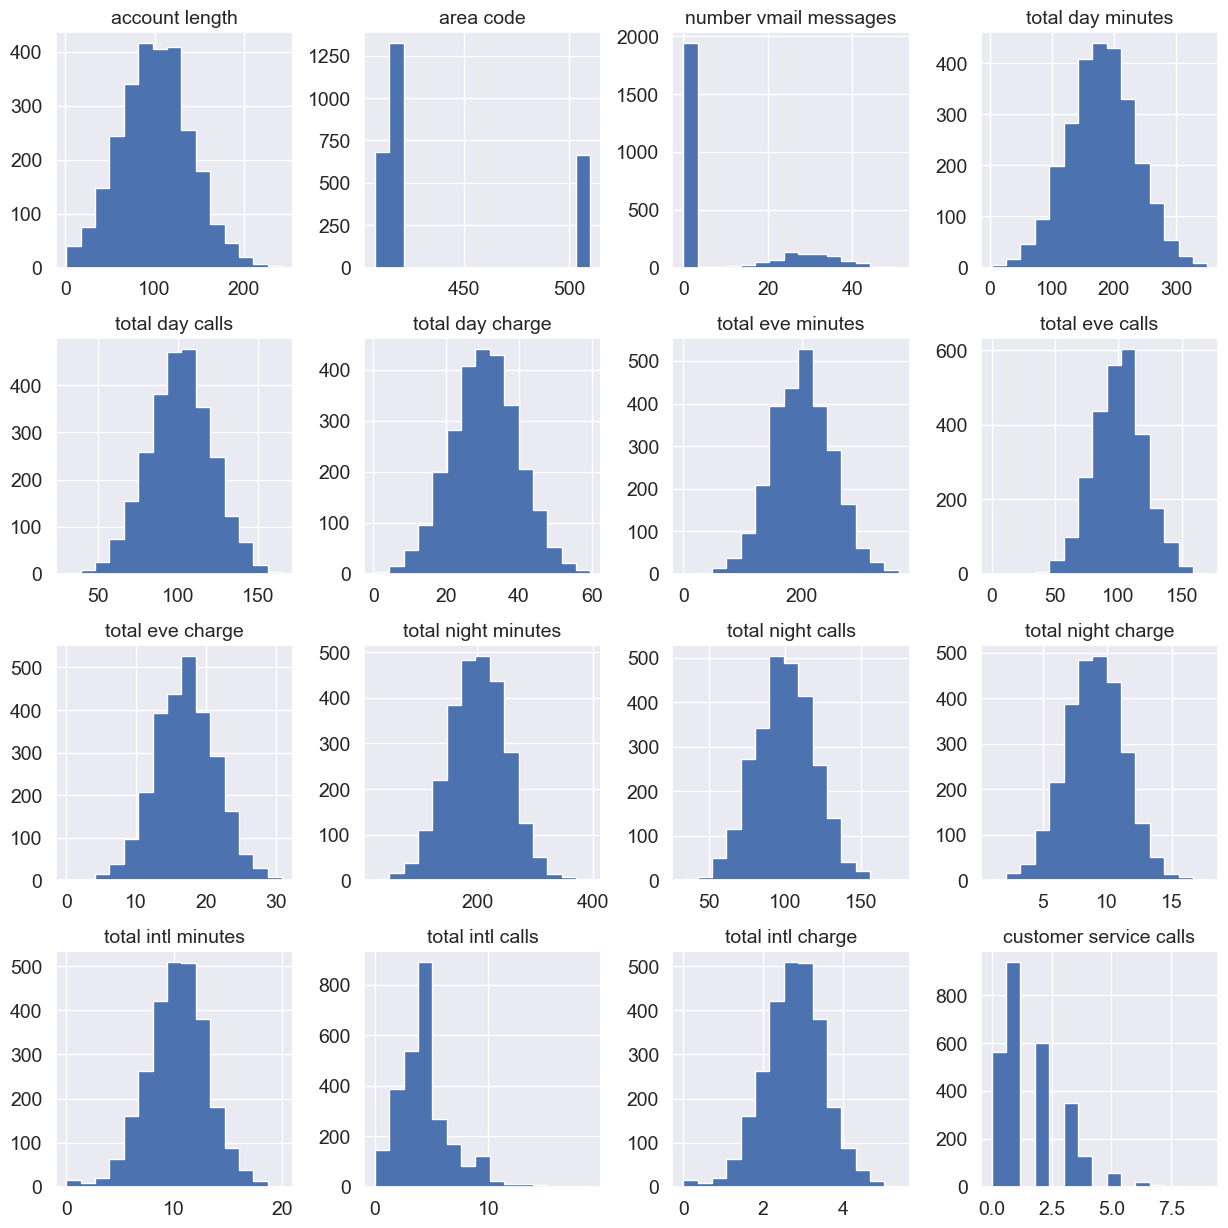

In [11]:
# Overview of the X_train data distribution to see scales of the data and if there are outliers. The skewnees of the data is revealed
sns.set_theme()

plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)

train_set.hist(bins = 15, histtype = 'stepfilled', figsize = (15, 15))
plt.show()

<p ### style="font-family: Arial; font-size:1.4em;" >Observations - histograms</p>

- It's observeed that the features have different scales. Thus, the needs for feature scaling for the machine learning purposes
- Most of the features (acount length, total day minutes, total day call etc.) are approximately normally distributed, which impliess that these features follow a distribution close to the normal (Gaussian) distribution.
- There is an outlier in number vmail messages feature.

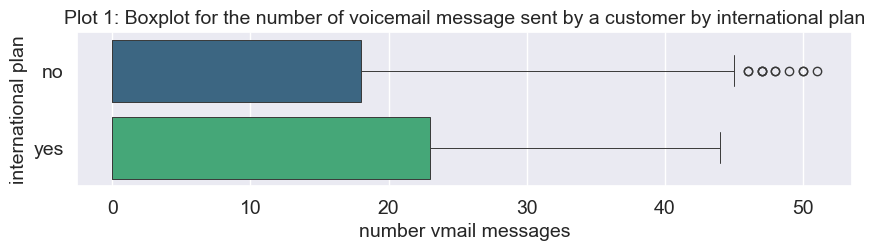

In [12]:
# number of voicemail message sent by a customer
plt.figure(figsize = (10, 2))
ax1 = sns.boxplot(data = train_set, y = 'international plan', x = 'number vmail messages', palette = 'viridis', orient = 'h', linewidth = 0.7)
plt.xlabel('number vmail messages')
plt.title('Plot 1: Boxplot for the number of voicemail message sent by a customer by international plan')
plt.show()

<p ### style="font-family: Arial; font-size:1.4em;" >Observations - boxplot</p>

- There are outliers in the number vmail messages features most expecially for customer without international plan.
- The minimum number vmail messages is equal to the lower quartile.

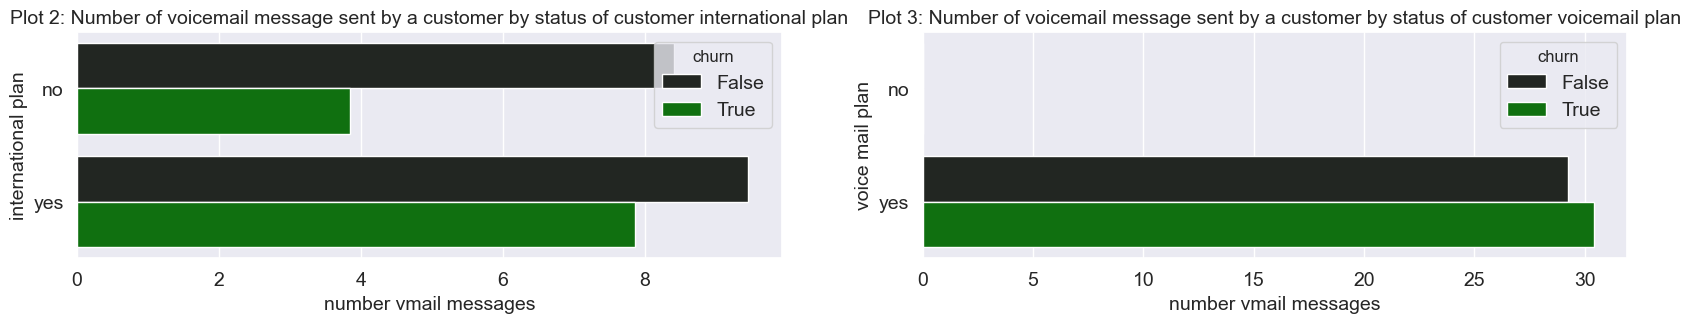

In [13]:
# check the effects of extra education from school and family on final grade G3
sns.set_theme()

plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('legend', fontsize = 14)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.figure(figsize = (20, 10))

# Plot 2: Effects of extra education from school and family on final grade G3
plt.subplot(3, 2, 1)
sns.barplot(data = train_set, y = 'international plan', x = 'number vmail messages', color = 'green', errorbar = None, orient = 'h',  hue = 'churn')
#sns.move_legend(ax1, 'lower right')
plt.title('Plot 2: Number of voicemail message sent by a customer by status of customer international plan')
plt.xlabel('number vmail messages')
plt.ylabel('international plan')

# Plot 3: Effects of extra education from school and family on final grade G3
plt.subplot(3, 2, 2)
sns.barplot(data = train_set, y = 'voice mail plan', x = 'number vmail messages', color = 'green', errorbar = None, orient = 'h',  hue = 'churn') 
#['total day charge', 'total eve charge',
#sns.move_legend(ax1, 'lower right')
plt.title('Plot 3: Number of voicemail message sent by a customer by status of customer voicemail plan')
plt.xlabel('number vmail messages')
plt.ylabel('voice mail plan')
plt.show()

<p ### style="font-family: Arial; font-size:1.4em;" >Observations</p>

- **Customers with international plan status has the highest numbers of voice mail messages**
- **Customer with no voice mail plan have zero number of voice messages**
- **The customers that are not on international plan status have high chance of discontinue their services compared to those that are on international plan status**

In [14]:
train_set['voice mail plan'].value_counts()

voice mail plan
no     1941
yes     725
Name: count, dtype: int64

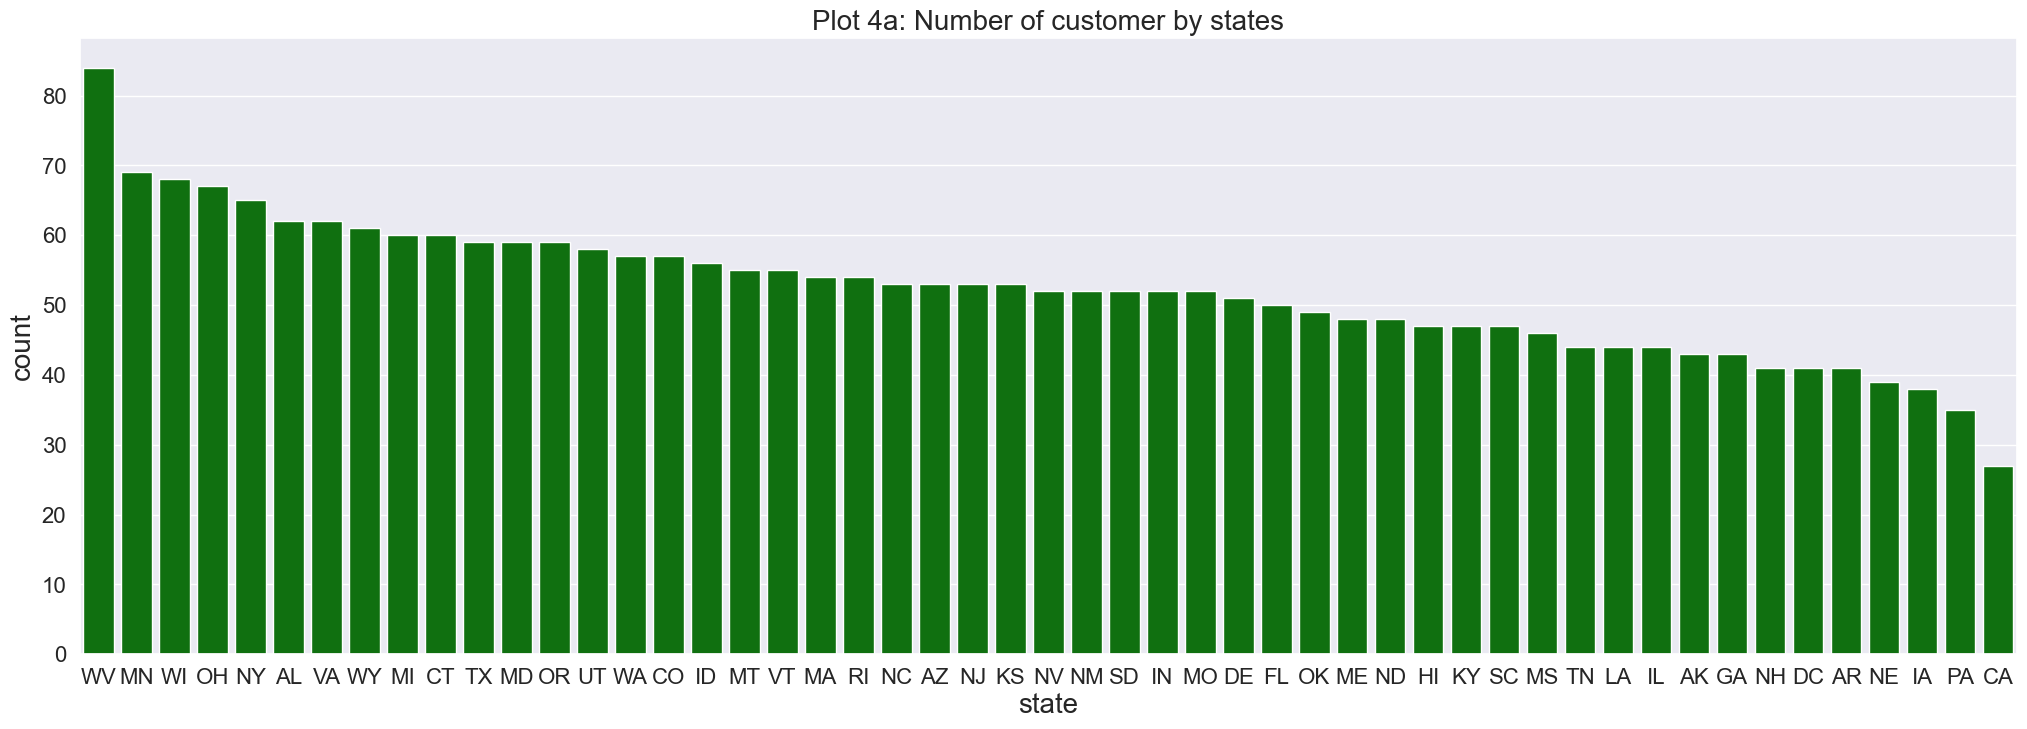

In [15]:
sns.set_theme()

plt.rc('font', size = 16)
plt.rc('axes', labelsize = 20, titlesize = 20)
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16)
plt.figure(figsize = (25, 8))
#sns.countplot(train_set, x = "state", order = train_set['state'].value_counts().index, color = 'green',  hue = 'churn')
sns.countplot(train_set, x = "state", order = train_set['state'].value_counts().index, color = 'green')
plt.title('Plot 4a: Number of customer by states')
plt.show()

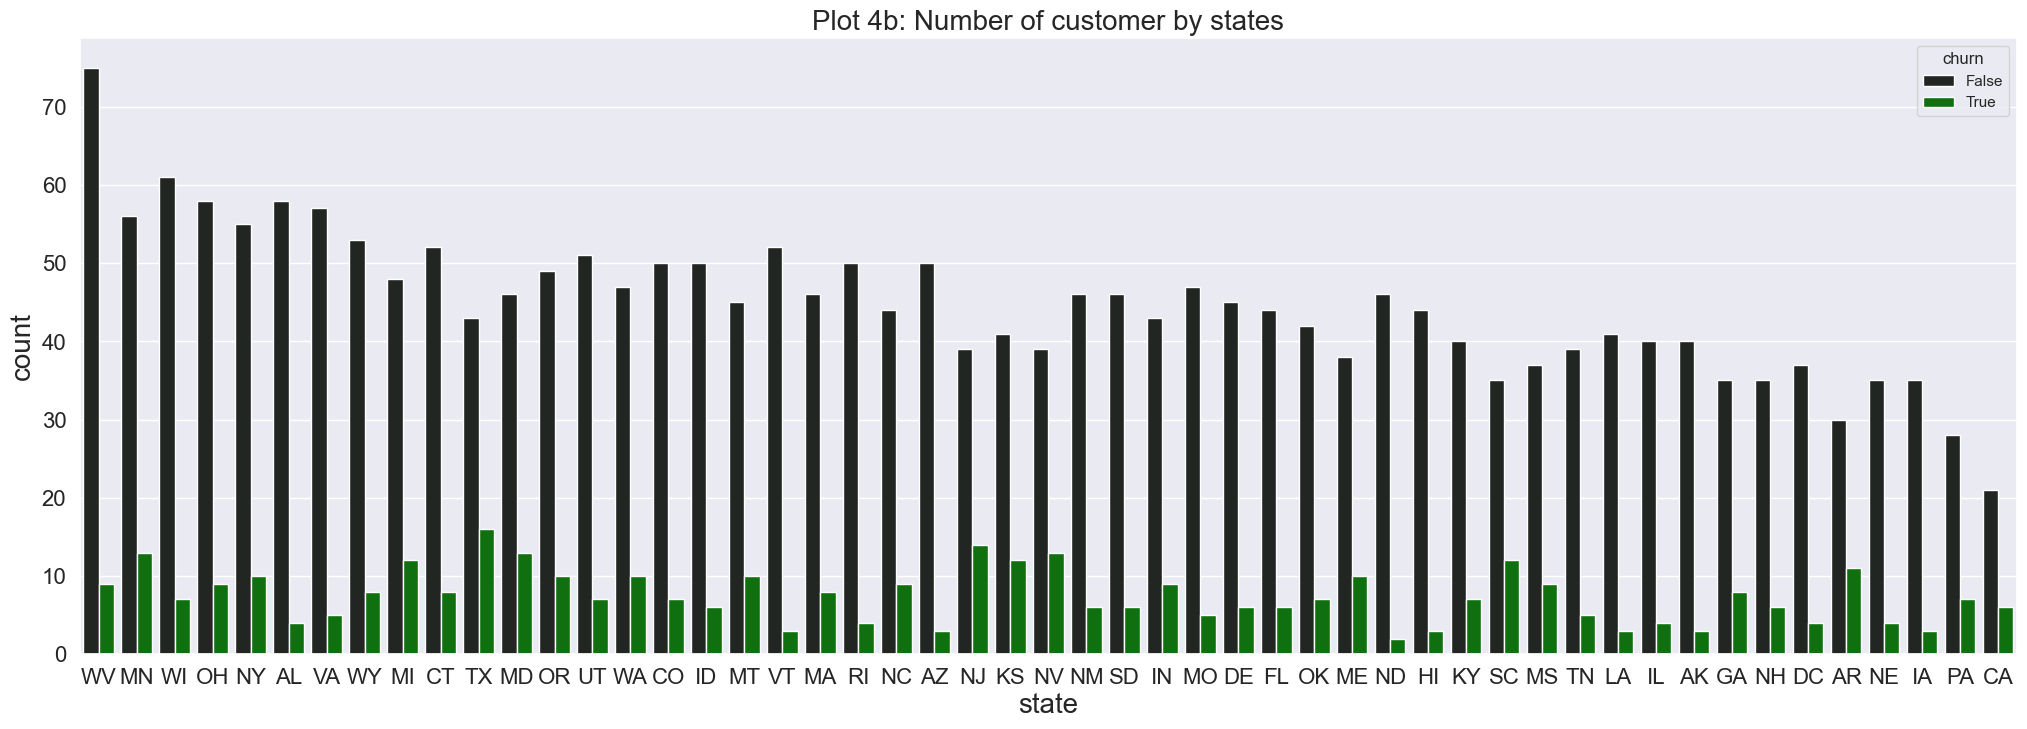

In [16]:
sns.set_theme()

plt.rc('font', size = 16)
plt.rc('axes', labelsize = 20, titlesize = 20)
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16)
plt.figure(figsize = (25, 8))
sns.countplot(train_set, x = "state", order = train_set['state'].value_counts().index, color = 'green',  hue = 'churn')
#sns.countplot(train_set, x = "state", order = train_set['state'].value_counts().index, color = 'green')
plt.title('Plot 4b: Number of customer by states')
plt.show()

<p ### style="font-family: Arial; font-size:1.4em;" >Observations</p>

- **The top five states with the highest number of customers for the telecom company are West Virginia, Minnesota, Wisconsin, Ohio, and New York.**
- **The bottom five states with the least number of customers for the telecom company are California, Pennsylvania, Iowa, Nebraska and Arkansas.**
- **Texas has highest number of customers that discontinued their service with the telecom company, followed by New Jersey, Arkansas Nevada and Maryland**

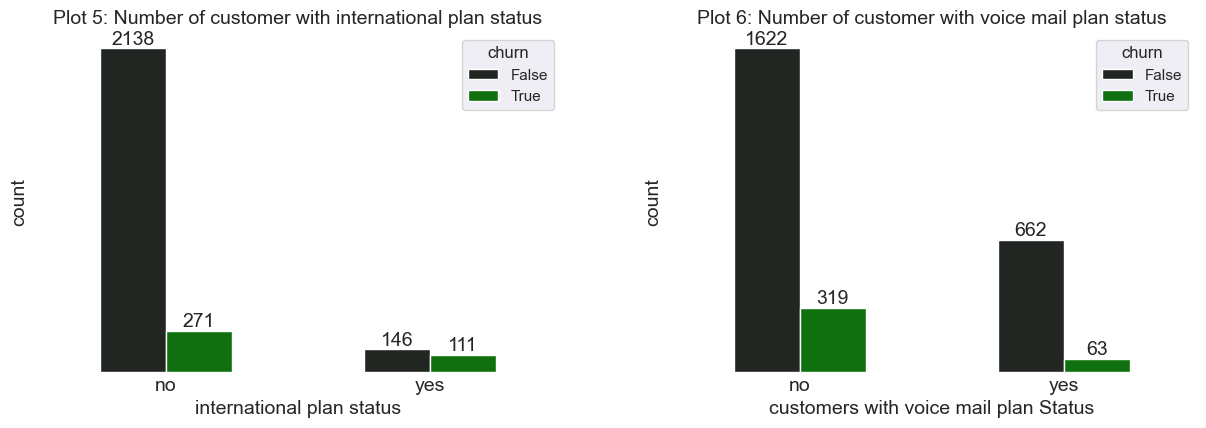

In [17]:
sns.set_theme()

plt.rc('font', size = 14)
plt.rc('axes', labelsize = 14, titlesize = 14)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.figure(figsize = (15, 15))
plt.subplot(3, 2, 1)
ax = sns.countplot(train_set, x = "international plan", orient = 'h', order = df_customer['international plan'].value_counts().index, 
                   color = 'green',  width = 0.5, hue = 'churn')
ax.set(xlabel = 'international plan status', yticks = [], title = 'Plot 5: Number of customer with international plan status', frame_on = False)
ax.tick_params(length = 0)                               # remove tick liens
ax.bar_label(ax.containers[0])                       # add bar labels
ax.bar_label(ax.containers[1])


plt.subplot(3, 2, 2)
ax = sns.countplot(train_set, x = "voice mail plan", orient = 'h', order = df_customer['voice mail plan'].value_counts().index, 
                   color = 'green', width = 0.5, hue = 'churn')
ax.set(xlabel = 'customers with voice mail plan Status', yticks = [], title = 'Plot 6: Number of customer with voice mail plan status', frame_on = False)
ax.tick_params(length = 0)                               # remove tick liens
ax.bar_label(ax.containers[0])                        # add bar labels
ax.bar_label(ax.containers[1]);
plt.show()

<p ### style="font-family: Arial; font-size:1.4em;" >Observations</p>

- **The customers that are not on international plan status have high chance of discontinue their services compared to those that are on international plan status**
- **Customers with international plan is less than 10% of the total telecom company subscribers**
- **Also, the customer with no voice mail plan is more than 70% of the total telecom company subscribers**

In [18]:
# Correlations between the train set variables/features
train_set1 = train_set.copy() # create a copy of the train data
# change the target vaiable from boolean to numeric 0 qnd 1 for False and True respectively
train_set1['churn'] = train_set1['churn'].map({False: 0, True: 1})

In [19]:
# Correlations between the train set variables/features
# select the numeric features names
num_column_names = [col for col in train_set1.columns if train_set1[col].dtype != 'object']
num_features = train_set1[num_column_names]
# num_features_df = train_set.select_dtypes(include = [np.number])
corr_matrix = num_features.corr()
# checking the correlation of other features with the target feature
corr_input_output_compared = corr_matrix['churn'].sort_values(ascending = False)
corr_input_output_compared

churn                     1.000000
customer service calls    0.212852
total day charge          0.191806
total day minutes         0.191804
total eve minutes         0.077947
total eve charge          0.077934
total intl charge         0.074336
total intl minutes        0.074331
area code                 0.032824
total night minutes       0.022003
total night charge        0.021992
account length            0.019311
total eve calls           0.013705
total night calls        -0.000511
total day calls          -0.000987
total intl calls         -0.060052
number vmail messages    -0.088963
Name: churn, dtype: float64

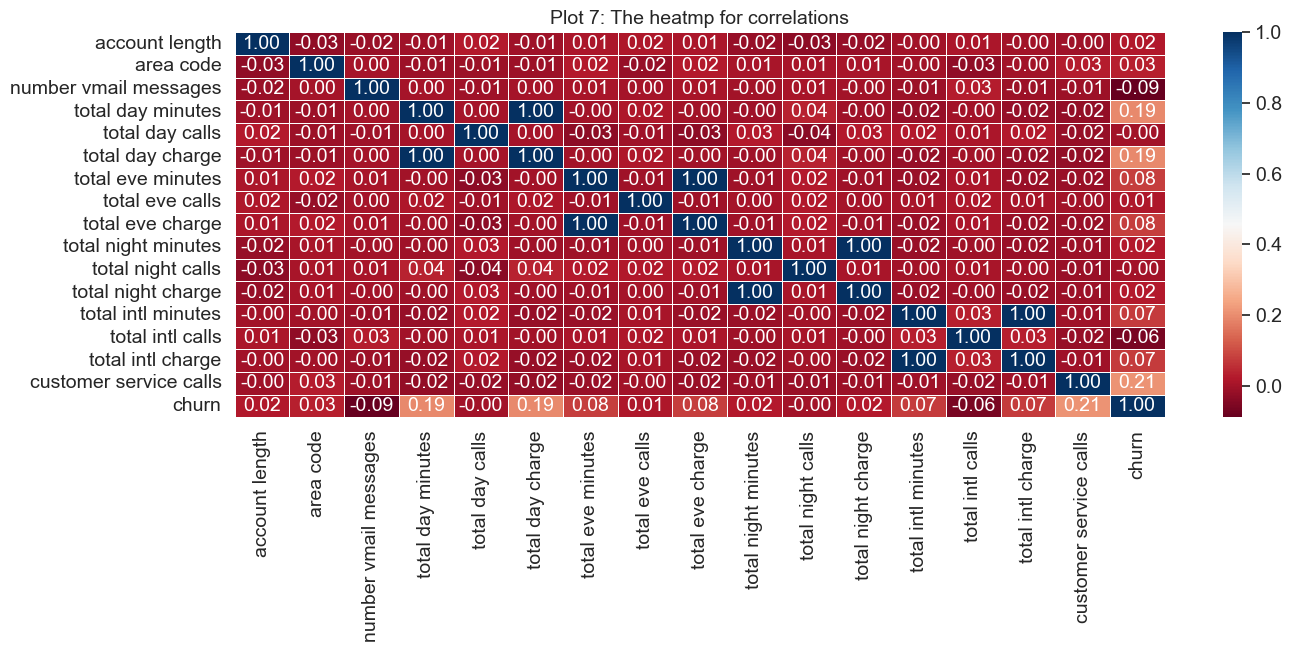

In [20]:
# heatmap
plt.figure(figsize = (15, 5))
sns.heatmap(data = corr_matrix, annot=True, fmt=".2f", cmap = 'RdBu', linewidth=.5)
plt.title('Plot 7: The heatmp for correlations')
plt.show()

In [21]:
num_features1 = num_features[['number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 
              'total eve calls', 'total eve charge', 'total night minutes', 'total night calls']]

<p ### style="font-family: Arial; font-size:1.4em;" >Observations - Heatmap</p>

Heatmap shows the correlations among the different numeric features for the telecom comapny's customer churn data 
* The features total day minutes & total day charge, total eve calls & total eve charge, total night minutes & total night charge and total intl calls & total intl charge are highly positively correlated.

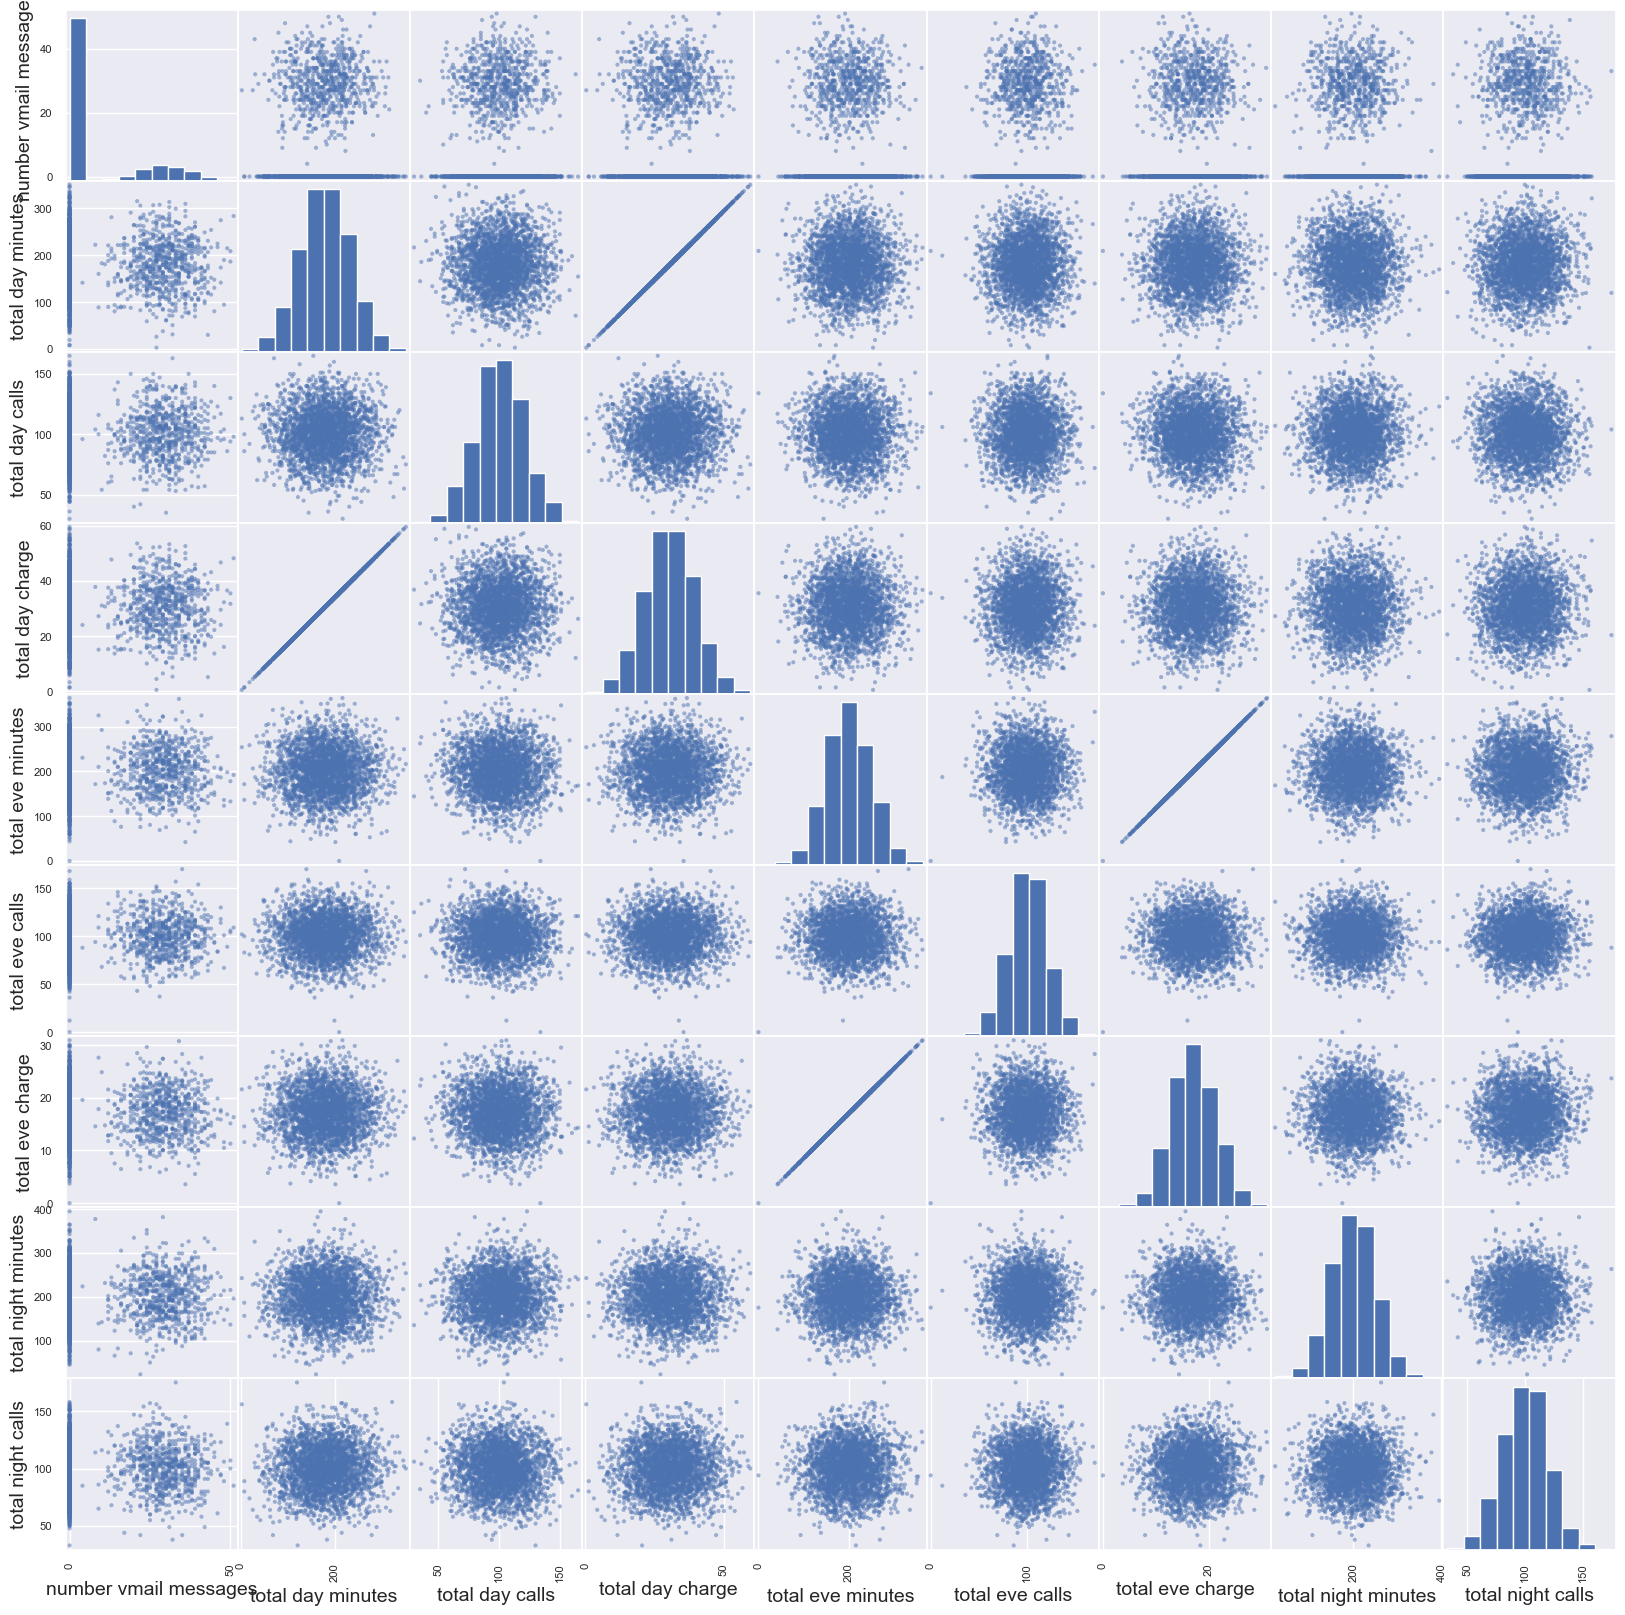

In [22]:
# correlation between attributes with scatter matrix
scatter_matrix(num_features1, diagonal='hist', figsize=(20, 20))
plt.show()

## Prepare customer churn info Data for Machine Learning - Data Cleaning
- Although there are no missing values in this data but there's need to provision for cases where future data values may be missing. Thus, the need to create a data pipeline for data cleaning, feature scaling.

In [23]:
# drop the target column from the X_train set
X_train = train_set.drop(columns = 'churn')
y_train = train_set['churn']

<p ### style="font-family: Arial; font-size:1.4em;" >Pipeline transform the numeric data and perform feature scaling of numeric data</p>

A numeric data pipeline is created to clean and scale numeric data

In [24]:
# Create numerical attributes pipeline true
numeric_pipeline = make_pipeline(SimpleImputer(strategy = 'median'),
                            StandardScaler() #  numeric continous feature scaling
                            )

<p ### style="font-family: Arial; font-size:1.4em;" >Pipeline to transform categorical data</p>

A categorical data pipeline is created to clean categoric data. It is observed that the categoric data are of two kid in this data set- ones in where order was not matter and case where order is matter and binary features. Thus, two data pipelines to separately cleaning these data set is needed.

In [25]:
# create category feature pipeline - norminal features
categoric_pipeline_a = make_pipeline(
                            SimpleImputer(strategy='most_frequent'),
                            OneHotEncoder(drop = 'first', handle_unknown='ignore')                             
                            )

In [26]:
# create category feature pipeline with binary features
categoric_pipeline_b = make_pipeline(
                        SimpleImputer(strategy='most_frequent'),
                        OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = np.nan) 
                        )

In [27]:
# create category feature pipeline with binary features for the traget feature
categoric_pipeline_c = make_pipeline(
                       OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = np.nan) 
                        )

In [28]:
# select the numeric values from train_set
num_features = X_train.select_dtypes(include = [np.number])

In [29]:
# select the categoric variable from train_set
X_cat_col_names = [col for col in df_customer.columns if df_customer[col].dtypes == 'object']
X_cat_col = train_set[X_cat_col_names]
# select/separate the binary features from categoric variable
X_cat_col_binary = X_cat_col[['international plan', 'voice mail plan']]
# drop the binary features from other categoric variables
X_cat_col = X_cat_col.drop(columns = ['international plan', 'voice mail plan'])

In [30]:
# create list of column names for numeric, categoric and binary features
num_attributes = list(num_features.columns)
cat_attributes_a = list(X_cat_col.columns)
cat_attributes_b = list(X_cat_col_binary.columns)

full_pipeline = ColumnTransformer([
                ('num_attibutes', numeric_pipeline, num_attributes),
                ('cat_attibutes_a', categoric_pipeline_a, cat_attributes_a),
                ('cat_attibutes_b', categoric_pipeline_b, cat_attributes_b)
        ])

In [31]:
# fit transform the pipeline
X_train_prepared = full_pipeline.fit_transform(X_train)
X_train_prepared = X_train_prepared.toarray()

In [32]:
# fit transform the the traget data set, because its a binary categoric variable
y_train_prepared = categoric_pipeline_c.fit_transform(y_train.to_frame())

### Measuring model accuracy Using Cross-Validation
**Although accuracy is the most and commonly used evaluating metric but it's generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others) like the current data. A much better way to evaluate the performance of a classifier is to look at the confusion matrix (CM), which is employed in evaluating precision an recall. While the combination of precision an recall are used in evaluating the f1 score, which balances the precision and recall so we can have a good metric even for imbalanced datasets. Thus, accuracy and f1 scores are used in comparing the different models considered.**

**In this task, the following algorithims will be evaluated:  k-nearest neighbors (KNN) classifier, random forest classifier, support vector machines (linear and non-linear), Gaussian process classification, stochastic gradient descent (SGD), neural network based on multi-layer Perceptron classifier,  decision tree classifier, graddient boost classifier, histogram basegriedient boost classifier and eXtreme Gradient Boosting Classifier.**

In [33]:
# create a list name of algorithms
model_names = ['Nearest_Neighbors', 'Random_forest', 'Linear_SVM', 'Nonlinear_SVM', 'Gaussian_RBF_kernel', 
               'Gaussian_Pro', 'Stochastic_Grad', 'Neural_Network', 'Decision_Tree', 'Grad_Boost', 
               'Hist_Grad_Boost', 'XGB_Boost']

In [34]:
# instantiating/defining each of the algorithm
clf_list = [KNeighborsClassifier(),
                    RandomForestClassifier(),
                    LinearSVC(C = 1, random_state = 42),
                    SVC(kernel = 'poly', degree = 3, coef0 = 1, C = 5),
                    SVC(kernel = 'rbf', gamma = 5, C = 0.001),
                    GaussianProcessClassifier(),
                    SGDClassifier(random_state=42),
                    MLPClassifier(),
                    DecisionTreeClassifier(random_state = 42),
                    GradientBoostingClassifier(random_state = 42), 
                    HistGradientBoostingClassifier(random_state = 42),
                    XGBClassifier()                     
                   ]

In [35]:
# evaluating the algorithms by outputing accuracy and f1 scores
for name, clf in zip(model_names, clf_list):
    clf.fit(X_train_prepared, y_train_prepared)
    accuracy_score = cross_val_score(clf, X_train_prepared, y_train_prepared, cv=3, scoring="accuracy").mean()
    y_train_predicts = cross_val_predict(clf, X_train_prepared, y_train_prepared, cv = 3)    
    # prec_score = precision_score(y_train_prepared, y_train_predicts)
    # recal_score = recall_score(y_train_prepared, y_train_predicts)
    f_score = f1_score(y_train_prepared, y_train_predicts)
    print("Model_name:", name, "accuracy_score:", "{:.2f}".format(accuracy_score), "f1_score:", "{:.2f}".format(f_score))

Model_name: Nearest_Neighbors accuracy_score: 0.88 f1_score: 0.30
Model_name: Random_forest accuracy_score: 0.88 f1_score: 0.31
Model_name: Linear_SVM accuracy_score: 0.86 f1_score: 0.26
Model_name: Nonlinear_SVM accuracy_score: 0.90 f1_score: 0.61
Model_name: Gaussian_RBF_kernel accuracy_score: 0.86 f1_score: 0.00
Model_name: Gaussian_Pro accuracy_score: 0.87 f1_score: 0.26
Model_name: Stochastic_Grad accuracy_score: 0.85 f1_score: 0.39
Model_name: Neural_Network accuracy_score: 0.89 f1_score: 0.59
Model_name: Decision_Tree accuracy_score: 0.94 f1_score: 0.76
Model_name: Grad_Boost accuracy_score: 0.94 f1_score: 0.76
Model_name: Hist_Grad_Boost accuracy_score: 0.95 f1_score: 0.82
Model_name: XGB_Boost accuracy_score: 0.95 f1_score: 0.81


<p ### style="font-family: Arial; font-size:1.4em;" >Observations - Algorithms</p>

- **Based on the values of accuracy and f1 scores, histogram basegriedient boost classifier has the highest accuracy and f1 score. Thus, histogram basegriedient boost classifier is chosen as the best algorithm.** 

# Fine-Tune Your Model

- **Since histogram basegriedient boost classifier has be chosen/selected as the most promising algorithm, it is further explored by tuning its hyperparameters for improving the algorithm. The RandomizedSearchCV is chosen over the Grid Search beacuse it gives a wider search spaces for the hyperparameters optimization.**

In [36]:
# instantiate the HistGradientBoostingClassifier
est = HistGradientBoostingClassifier(learning_rate = 0.2, random_state = 42)
# define the distributions of the parameter
hgbc_p_dist = {'max_iter': [50, 100, 150],
            'max_leaf_nodes': [20, 30, 40],
            'max_depth': [2, 4, 6, 8],
            'min_samples_leaf': randint(1, 4),
            'class_weight': ['dict', 'balanced'],
            'max_features': [0, 0.1, 0.2, 0.3, 0.6, 0.8, 1] 
            }

In [37]:
# create function for the RandomizedSearchCV hyperparameter tuning
def hypertuning_rscv(est, p_distr, nbr_iter, X, y):
    rdmsearch = RandomizedSearchCV(est, param_distributions = p_distr, n_jobs = -1, scoring = 'f1',
                                   n_iter = nbr_iter, cv = 9)

    rdmsearch.fit(X, y)
    best_params = rdmsearch.best_params_
    best_score = rdmsearch.best_score_
        
    return rdmsearch, best_params, best_score


rdmsearch, hgbc_best_parameters, hgbc_best_score = hypertuning_rscv(est, hgbc_p_dist, 40, X_train_prepared, y_train_prepared)

In [38]:
hgbc_best_parameters

{'class_weight': 'balanced',
 'max_depth': 8,
 'max_features': 0.8,
 'max_iter': 50,
 'max_leaf_nodes': 30,
 'min_samples_leaf': 1}

In [39]:
rdmsearch

RandomizedSearchCV(cv=9,
                   estimator=HistGradientBoostingClassifier(learning_rate=0.2,
                                                            random_state=42),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'class_weight': ['dict', 'balanced'],
                                        'max_depth': [2, 4, 6, 8],
                                        'max_features': [0, 0.1, 0.2, 0.3, 0.6,
                                                         0.8, 1],
                                        'max_iter': [50, 100, 150],
                                        'max_leaf_nodes': [20, 30, 40],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BDF9173410>},
                   scoring='f1')

In [40]:
hgbc_best_score

np.float64(0.8330397072223892)

<p ### style="font-family: Arial; font-size:1.4em;" >Observations - hyperparameter tuning</p> 

- **The best estimator is slightly better than the f1-score using the default**

## Evaluating the chosen algorithm on the Test Set

The chosen algorithm, HistGradientBoostingClassifier is tested/learned on test set data

In [41]:
# separate features and labels in test set
X_test = test_set.drop("churn", axis=1)
y_test = test_set["churn"].copy()

In [42]:
# transform test set features -- DO NOT USE fit_transform
X_test_prepared = full_pipeline.transform(X_test).toarray()

In [43]:
X_test_prepared = full_pipeline.transform(X_test)

In [44]:
# fit transfor the the traget data set, because its a binary categoric variable
y_test_prepared = categoric_pipeline_c.fit_transform(y_test.to_frame())

In [45]:
final_model = rdmsearch.best_estimator_

In [46]:
final_y_test_prediction = final_model.predict(X_test_prepared.toarray())

In [47]:
test_precision_score = precision_score(y_test_prepared, final_y_test_prediction)
test_recall_score = recall_score(y_test_prepared, final_y_test_prediction)
test_f1_score = f1_score(y_test_prepared, final_y_test_prediction)

In [48]:
test_precision_score

np.float64(0.8469387755102041)

In [49]:
test_recall_score

np.float64(0.8217821782178217)

In [50]:
test_f1_score

np.float64(0.8341708542713567)

<p ### style="font-family: Arial; font-size:1.4em;" >Observations -test set</p>

- **The f1-score, precision and recall scores are 0.84 and 0.94, 0.75 respectively**

## Conclusion

Conclusively, this project aim at accurately predict the telecom company's customers that will leave the service of the company based on different factors - phone number, international plan, voice mail plan, number vmail messages, total day minutes, total day calls, total day charge, total eve minutes, total eve calls, total eve charge, total night minutes, total night calls, total night charge, total intl minutes, total intl calls, total intl charge, and customer service calls. The output of this project provides insights on factors resulting in telecom company loosing their customers to competitors, thus give them opportunities to deveop strategies to retain their customers.

The telecom company churn customer data was obtained from Kaggle. The data contains customer information from about 51 states in the US. Although, the present data is a little cleaner, nonetheless the posibility of unclean data in the future can't be over ruled. Thus, data cleanning and preprocessing were implemented through the following:

- Use of Sklearn SimpleImputer class to handle cases of missing values from the telecom comapny's customer churn data.
- Use of Sklearn StandardScaler function method for standardizing features with a view to remove the mean and scale to unit variance.
- Use of OneHotEndcoder to encode categorical features in the telecom comapny's customer churn data.
- Use of OrdinalEncoder to encoder categoric features where order is given priority.
- Use of cross validation function to make better evaluations of the different models

The exploratory data analysis (EDA) reveals that customers that are not on international plan status have high chance of discontinue their services compared to those that are on international plan status. The state of Texas has highest number of customers that discontinued their service with the telecom company, followed by New Jersey, Arkansas Nevada and Maryland. The top five states with the highest number of customers for the telecom company are West Virginia, Minnesota, Wisconsin, Ohio, and New York while, thee bottom five states with the least number of customers for the telecom company are California, Pennsylvania, Iowa, Nebraska and Arkansas Also, the features (heat map) following features were observed to be strongly positively correlated - total day minutes & total day charge, total eve calls & total eve charge, total night minutes & total night charge and total intl calls & total intl charge.

The current task explored different machine learning algorithms (Nearest_Neighbors, Random_forest, Linear_SVM, Nonlinear_SVM, Gaussian_RBF_kernel, Gaussian_Pro, Stochastic_Grad, Neural_Network, Decision_Tree, Grad_Boost, Hist_Grad_Boost, and XGB_Boost') were considered for the training the train data set and their performances were evaluated using the cross-validation function with the f1-score and accuracy were used as performance metrics. The algorithm with the highest f1-score (0.82) and accuracy (0.95) scores is histogram basegriedient boost classifier, which was chosen for hyperparameter tuning using random search to determine the best parameters and estimatpr for final model selection.

The chosen algorithm was evaluated on the test set. The evaluation on test set gave f1-score, precision and recall scores of 0.83 and 0.85, 0.82 respectively.